In [122]:
from google.colab import files
uploaded = files.upload()


Saving Azure_demand_forecasting_Dataset.csv to Azure_demand_forecasting_Dataset (4).csv


In [123]:
import pandas as pd

df = pd.read_csv("Azure_demand_forecasting_Dataset.csv")
df.head()


,timestamp,azure_region,service_type,demand_units,capacity_allocated,service_availability,is_holiday,gdp_growth_rate,inflation_rate,it_sector_growth_index
0,01-01-2023,India,Compute,123,151,99.94,1,5.62,6.8,111.96
1,01-01-2023,India,Storage,181,210,99.66,1,5.62,6.8,111.96
2,01-01-2023,US,Compute,219,274,99.76,1,5.62,6.8,111.96
3,01-01-2023,US,Storage,206,230,99.92,1,5.62,6.8,111.96
4,01-01-2023,Europe,Compute,271,298,99.59,1,5.62,6.8,111.96


In [124]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               3240 non-null   object 
 1   azure_region            3240 non-null   object 
 2   service_type            3240 non-null   object 
 3   demand_units            3240 non-null   int64  
 4   capacity_allocated      3240 non-null   int64  
 5   service_availability    3240 non-null   float64
 6   is_holiday              3240 non-null   int64  
 7   gdp_growth_rate         3240 non-null   float64
 8   inflation_rate          3240 non-null   float64
 9   it_sector_growth_index  3240 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 253.3+ KB


In [125]:
df.isnull().sum()


,0
timestamp,0
azure_region,0
service_type,0
demand_units,0
capacity_allocated,0
service_availability,0
is_holiday,0
gdp_growth_rate,0
inflation_rate,0
it_sector_growth_index,0


In [126]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [127]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               3240 non-null   datetime64[ns]
 1   azure_region            3240 non-null   object        
 2   service_type            3240 non-null   object        
 3   demand_units            3240 non-null   int64         
 4   capacity_allocated      3240 non-null   int64         
 5   service_availability    3240 non-null   float64       
 6   is_holiday              3240 non-null   int64         
 7   gdp_growth_rate         3240 non-null   float64       
 8   inflation_rate          3240 non-null   float64       
 9   it_sector_growth_index  3240 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 253.3+ KB


In [128]:
print("Negative demand:", (df['demand_units'] < 0).sum())
print("Availability > 100:", (df['service_availability'] > 100).sum())


Negative demand: 0
Availability > 100: 0


In [129]:
df.to_csv("azure_demand_cleaned.csv", index=False)


In [130]:
from google.colab import files
files.download("azure_demand_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter


In [132]:
df.to_csv("azure_demand_final_milestone1.csv", index=False)


In [133]:
from google.colab import files
files.download("azure_demand_final_milestone1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
#Azure Demand Forecasting – Milestone 2
#model without lag features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [135]:
# loading the dataset
df = pd.read_csv("azure_demand_cleaned.csv")
df.head()

,timestamp,azure_region,service_type,demand_units,capacity_allocated,service_availability,is_holiday,gdp_growth_rate,inflation_rate,it_sector_growth_index
0,2023-01-01,India,Compute,123,151,99.94,1,5.62,6.8,111.96
1,2023-01-01,India,Storage,181,210,99.66,1,5.62,6.8,111.96
2,2023-01-01,US,Compute,219,274,99.76,1,5.62,6.8,111.96
3,2023-01-01,US,Storage,206,230,99.92,1,5.62,6.8,111.96
4,2023-01-01,Europe,Compute,271,298,99.59,1,5.62,6.8,111.96


In [136]:
#converting time stamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter
df['day_of_week'] = df['timestamp'].dt.dayofweek

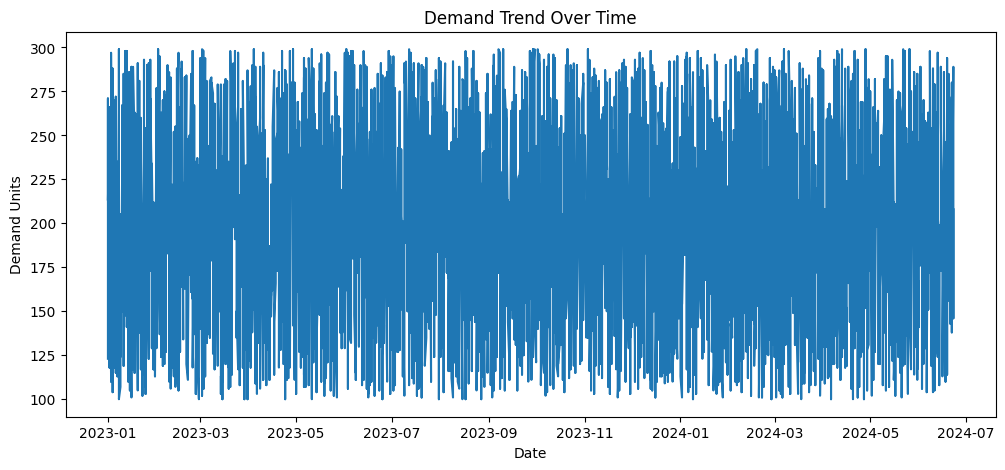

In [137]:
#demand trend overtime
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['demand_units'])
plt.title("Demand Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Demand Units")
plt.show()

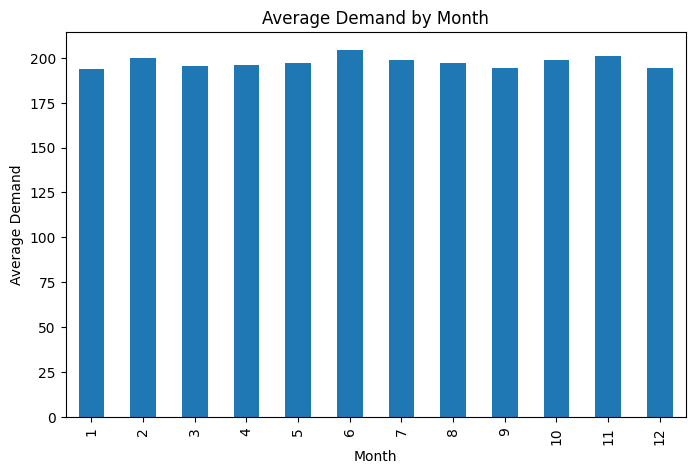

In [138]:
# Monthly demand aggregation
monthly_demand = df.groupby('month')['demand_units'].mean()

plt.figure(figsize=(8,5))
monthly_demand.plot(kind='bar')
plt.title("Average Demand by Month")
plt.xlabel("Month")
plt.ylabel("Average Demand")
plt.show()

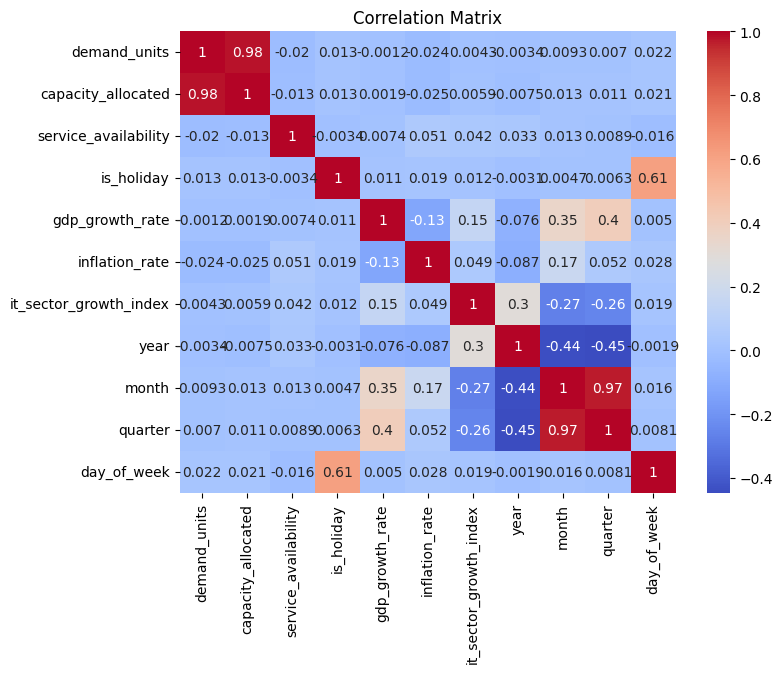

In [139]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [140]:
### Correlation Insights

- Demand units show strong positive correlation with capacity allocation (0.98).
- Month and quarter are highly correlated (0.97), as quarter is derived from month.
- Economic indicators show moderate influence on demand.
- No extreme negative correlations observed.

SyntaxError: invalid syntax (3970199059.py, line 3)

In [141]:
#preparing datat for model
X = df[['year', 'month', 'quarter', 'day_of_week',
        'gdp_growth_rate', 'inflation_rate',
        'it_sector_growth_index', 'capacity_allocated']]

y = df['demand_units']

In [142]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [143]:
#Train Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [146]:
y_pred = model.predict(X_test)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 10.118176624044679
MSE: 146.68445858866767
RMSE: 12.111335953918035
R2 Score: 0.9540659686561235


In [ ]:
#conclusion
## 6. Conclusion

The Random Forest regression model achieved strong predictive performance with an R² score of 0.95, indicating that 95% of the variance in Azure demand is explained by the selected features.

The low MAE and RMSE values show that prediction errors are minimal. Capacity allocation shows strong correlation with demand, while economic indicators provide additional predictive strength.

This model can assist in effective Azure capacity planning and demand forecasting.

In [148]:
#model with lag features
# Create lag features (previous 7 days demand)

for i in range(1, 8):
    df[f'lag_{i}'] = df['demand_units'].shift(i)

df.head()

,timestamp,azure_region,service_type,demand_units,capacity_allocated,service_availability,is_holiday,gdp_growth_rate,inflation_rate,it_sector_growth_index,...,month,quarter,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2023-01-01,India,Compute,123,151,99.94,1,5.62,6.8,111.96,...,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,India,Storage,181,210,99.66,1,5.62,6.8,111.96,...,1,1,6,123.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01,US,Compute,219,274,99.76,1,5.62,6.8,111.96,...,1,1,6,181.0,123.0,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,US,Storage,206,230,99.92,1,5.62,6.8,111.96,...,1,1,6,219.0,181.0,123.0,NaN,NaN,NaN,NaN
4,2023-01-01,Europe,Compute,271,298,99.59,1,5.62,6.8,111.96,...,1,1,6,206.0,219.0,181.0,123.0,NaN,NaN,NaN


In [149]:
df.dropna(inplace=True)

In [152]:
X = df[['year', 'month', 'quarter', 'day_of_week',
        'gdp_growth_rate', 'inflation_rate',
        'it_sector_growth_index', 'capacity_allocated',
        'lag_1', 'lag_2', 'lag_3', 'lag_4',
        'lag_5', 'lag_6', 'lag_7']]

y = df['demand_units']

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 9.370293663060279
RMSE: 11.29273198443733
R2 Score: 0.9617981673376461


In [156]:
### Model Improvement Using Lag Features

After introducing lag features (previous 7 days demand), the model performance improved from R² = 0.95 to R² = 0.96.

This indicates that historical demand plays an important role in predicting future Azure demand. Lag features helped the model capture temporal dependencies and improved forecasting accuracy.

SyntaxError: invalid character '²' (U+00B2) (3983312335.py, line 3)

In [157]:
## 8. Rolling Mean Feature Engineering
# 7-day rolling mean
df['rolling_7'] = df['demand_units'].rolling(window=7).mean()

df.head()

,timestamp,azure_region,service_type,demand_units,capacity_allocated,service_availability,is_holiday,gdp_growth_rate,inflation_rate,it_sector_growth_index,...,quarter,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_7
7,2023-01-02,India,Storage,266,320,99.64,0,5.62,6.8,111.96,...,1,0,262.0,213.0,271.0,206.0,219.0,181.0,123.0,NaN
8,2023-01-02,US,Compute,236,288,99.80,0,5.62,6.8,111.96,...,1,0,266.0,262.0,213.0,271.0,206.0,219.0,181.0,NaN
9,2023-01-02,US,Storage,118,156,99.74,0,5.62,6.8,111.96,...,1,0,236.0,266.0,262.0,213.0,271.0,206.0,219.0,NaN
10,2023-01-02,Europe,Compute,177,214,99.70,0,5.62,6.8,111.96,...,1,0,118.0,236.0,266.0,262.0,213.0,271.0,206.0,NaN
11,2023-01-02,Europe,Storage,186,245,99.80,0,5.62,6.8,111.96,...,1,0,177.0,118.0,236.0,266.0,262.0,213.0,271.0,NaN


In [ ]:
#Drop NaN Values
df.dropna(inplace=True)


In [ ]:
#Updating Feature Set
X = df[['year', 'month', 'quarter', 'day_of_week',
        'gdp_growth_rate', 'inflation_rate',
        'it_sector_growth_index', 'capacity_allocated',
        'lag_1', 'lag_2', 'lag_3', 'lag_4',
        'lag_5', 'lag_6', 'lag_7',
        'rolling_7']]

y = df['demand_units']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

In [ ]:
### Rolling Mean Experiment

A 7-day rolling mean feature was introduced to capture short-term trends. However, the model performance slightly decreased (R² reduced from 0.9618 to 0.9603).

This indicates that lag features were sufficient to capture temporal dependencies, and rolling mean did not provide additional predictive benefit.

In [158]:
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 7 to 3239
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               3233 non-null   datetime64[ns]
 1   azure_region            3233 non-null   object        
 2   service_type            3233 non-null   object        
 3   demand_units            3233 non-null   int64         
 4   capacity_allocated      3233 non-null   int64         
 5   service_availability    3233 non-null   float64       
 6   is_holiday              3233 non-null   int64         
 7   gdp_growth_rate         3233 non-null   float64       
 8   inflation_rate          3233 non-null   float64       
 9   it_sector_growth_index  3233 non-null   float64       
 10  year                    3233 non-null   int32         
 11  month                   3233 non-null   int32         
 12  quarter                 3233 non-null   int32        

,0
timestamp,0
azure_region,0
service_type,0
demand_units,0
capacity_allocated,0
service_availability,0
is_holiday,0
gdp_growth_rate,0
inflation_rate,0
it_sector_growth_index,0
